# Problem Set 0
### Author: Thomas Wiemann

### Preliminaries

In [3]:
# Load necessary libraries
library(ggplot2) # for plots

# Source custome code
source("mymethods/ols.R")

### Data

In [6]:
# Import data from csv file
df <- read.csv(file = "Data/test_data.csv", header = TRUE, sep = ",")

### Summary Statistics

 Print first 10 rows to get a first look at the variables. It looks like y, X1,  and X2 are continious but X3 is discrete. Also, get a sense of the    dimension of the data.

In [8]:
head(df, 10)

dim(df) # 1620 observations with 4 variables

,y,X.1,X.2,X.3
,<dbl>,<dbl>,<dbl>,<int>
1,9.7516904,2.5643484,0.8810713,3
2,1.9088771,-2.4285707,-0.1131153,4
3,7.0013882,-1.0436196,1.0608216,1
4,1.0100509,-1.4714928,-0.7534666,4
5,13.8330787,1.9464727,2.6209037,1
6,11.3400237,1.0831001,1.6740361,4
7,11.2271173,1.8654452,-0.6868575,5
8,0.7761037,-2.6291071,0.4590107,4
9,-2.7957775,-3.1431066,0.7044747,3


[1] 1620    4

Calculate summary statistics for each variable. First, use the `summary` command. Then, replicate the mean with the `apply` function. Also  calculate the 10th, and 90th quantile of each  vaiable, as well as their   standard deviation. Combine the summary statistics in a dataframe.

In [11]:
summary(df)

       y               X.1               X.2               X.3       
 Min.   :-7.837   Min.   :-5.2432   Min.   :-1.9995   Min.   :1.000  
 1st Qu.: 1.894   1st Qu.:-2.2168   1st Qu.:-0.8427   1st Qu.:2.000  
 Median : 5.276   Median :-1.0671   Median : 0.4010   Median :3.000  
 Mean   : 5.810   Mean   :-0.4284   Mean   : 0.4379   Mean   :3.016  
 3rd Qu.: 9.838   3rd Qu.: 1.6498   3rd Qu.: 1.6886   3rd Qu.:4.000  
 Max.   :22.344   Max.   : 5.5766   Max.   : 2.9943   Max.   :5.000  

In [12]:
var_mean <- apply(X = df, MARGIN = 2, FUN = mean) 
var_sd <- apply(X = df, MARGIN = 2, FUN = sd) 
var_quantiles <- apply(X = df, MARGIN = 2, 
                       FUN = function(x) {
                         quantile(x, c(0.1, 0.9))
                       })#APPLY

df_sumstats <- data.frame(rbind(var_mean, var_sd, var_quantiles))
df_sumstats

,y,X.1,X.2,X.3
,<dbl>,<dbl>,<dbl>,<dbl>
var_mean,5.8102100,-0.4283659,0.4378677,3.016049
var_sd,5.1790325,2.1947526,1.4461576,1.419354
10%,-0.6401808,-2.9793838,-1.5248697,1.000000
90%,13.1608986,2.6684017,2.4686123,5.000000


The summary statistics calculated so far may not be particularly informative    about X3, the discrete variable. Here, a tabulation may give better  insights. It looks like the five distinct values of X3 are approximately   uniformly distributed in the sample.

In [13]:
table(df$X.3) # frequency of values within the data

table(df$X.3) / dim(df)[1] # relative frequencies


  1   2   3   4   5 
323 322 308 340 327 


        1         2         3         4         5 
0.1993827 0.1987654 0.1901235 0.2098765 0.2018519 

### Descriptive regression analysis

As a last part of the analysis here, we characterize the conditional distribution distribution of y given X via linear regression. R's built-in  command for linear regression is `lm`, which we use here first. To obtain the coefficient values and corresponding standard errors, we use the  `summary` method (also built-in).

In [14]:
fit_lm <- lm(y ~ ., data = df) # linear regression of y on X and a constant
summary(fit_lm) # get coefficient values and standard errors


Call:
lm(formula = y ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0028 -1.5431  0.2806  1.6243  6.4738 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.15992    0.13734  44.852   <2e-16 ***
X.1          1.98620    0.02628  75.588   <2e-16 ***
X.2          1.01089    0.03989  25.344   <2e-16 ***
X.3          0.01939    0.04063   0.477    0.633    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.32 on 1616 degrees of freedom
Multiple R-squared:  0.7997,	Adjusted R-squared:  0.7994 
F-statistic:  2151 on 3 and 1616 DF,  p-value: < 2.2e-16


Let us briefly check whether the regression output is sensible. For example,   let's plot the regression residuals against our three variables X1-X3. We    can use R's build in `plot` function for this. 



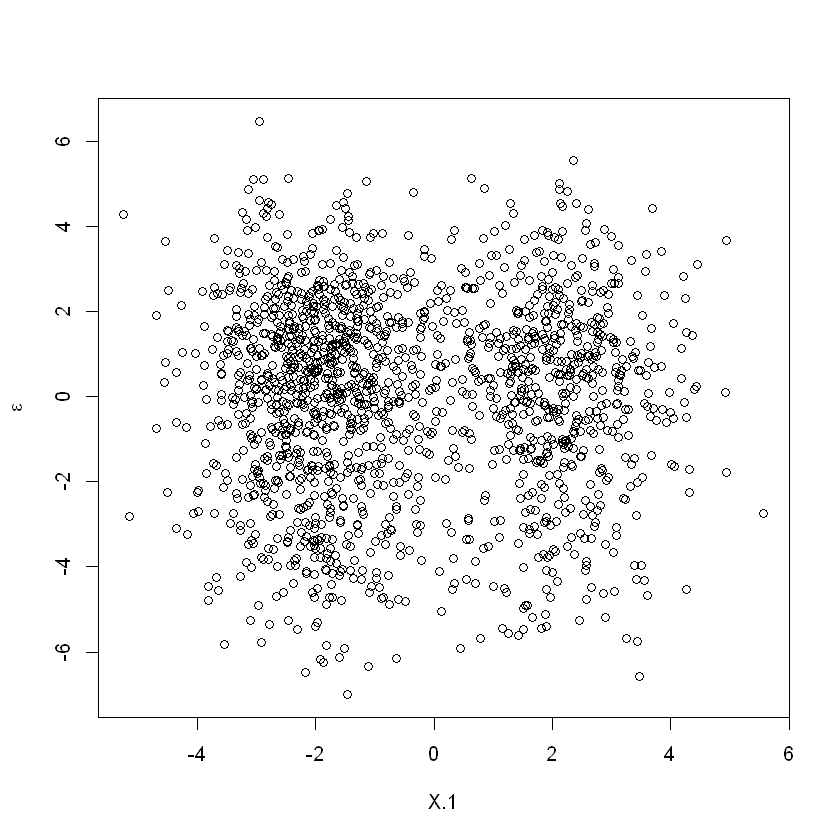

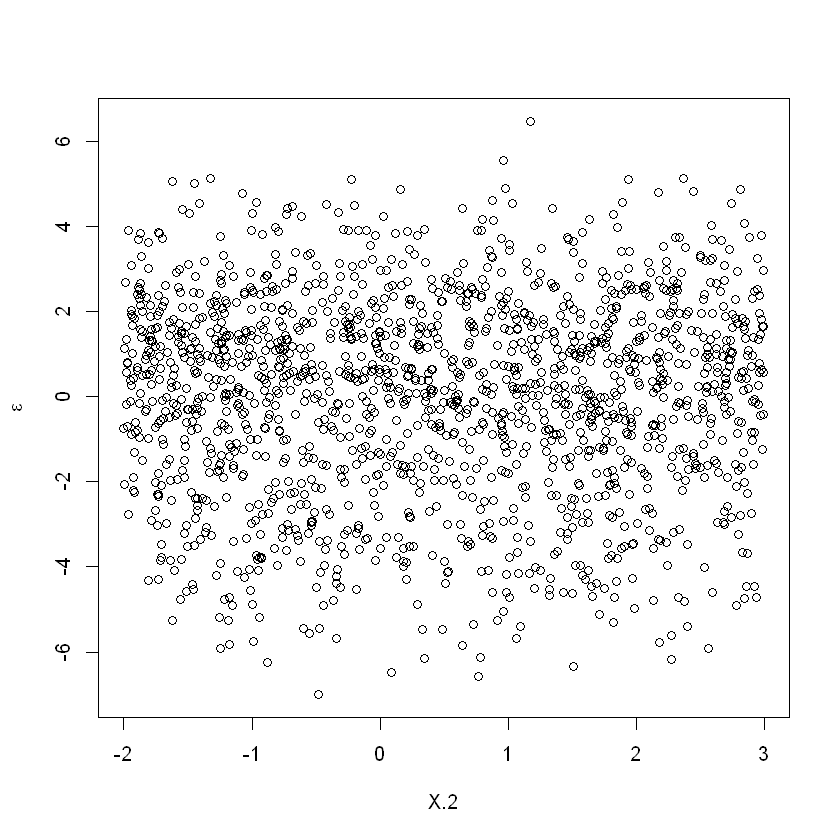

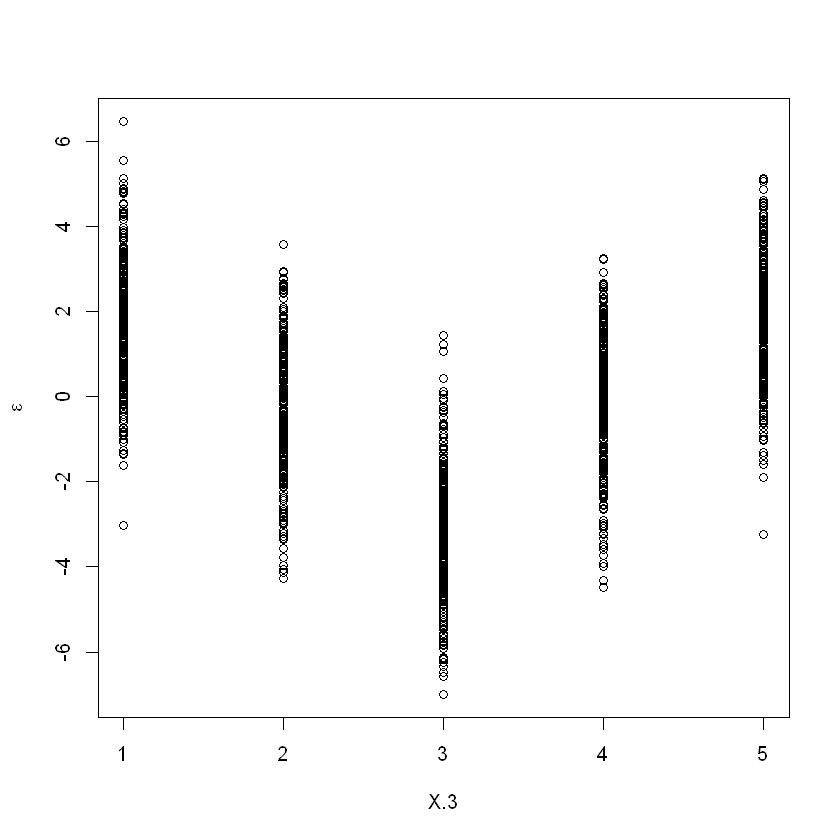

In [15]:
plot(x = df$X.1, y = fit_lm$residuals, 
     xlab = "X.1", ylab = expression(epsilon))
plot(x = df$X.2, y = fit_lm$residuals, 
     xlab = "X.2", ylab = expression(epsilon))
plot(x = df$X.3, y = fit_lm$residuals, 
     xlab = "X.3", ylab = expression(epsilon))

For better plots with more customization options, the reccomended package is   `ggplot2`. In the below, the third residual plot is reproduced and exported   as a .pdf file (e.g., so that it can be included in a LaTeX document.)


png 
  2

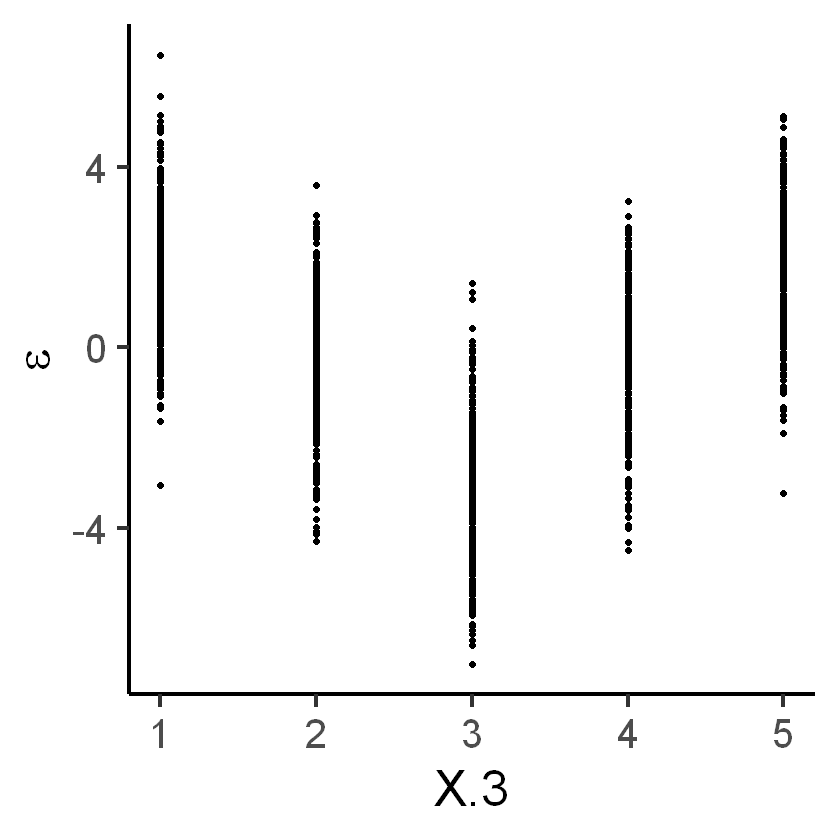

In [18]:
pdf("Results/Problem_Set_0/Figures/plt_residualX3.pdf", 
    width=10, height=8, paper='special') 

df_plt <- data.frame(X.3 = df$X.3, eps = fit_lm$residuals)
plt <- ggplot(df_plt, aes(x = X.3, y = eps)) + 
  geom_point()  +
  ylab(expression(epsilon)) +
  xlab("X.3") +
  theme_classic(base_size = 30)
print(plt)

dev.off() # make sure to include this when using `pdf`

plt # include this so that it's printed to the jupyter notebook

The third plot, where we consider X3, suggests that we did not correctly capture the relationship between y and X3 with the linear model considered above. Note that we did not differentiate between the continious X1 and   X2, and the discrete X3. To allow for nonlinearities, it may be better to   use indicator variables for different levels of X3. To do so, first set   the variable type to factor. R will then include indicator variables when  calling `lm`.

In [20]:
df$X.3 <- as.factor(df$X.3)
fit_lm2 <- lm(y ~ ., data = df)
summary_2 <- summary(fit_lm2) # that looks a lot better! 
summary_2


Call:
lm(formula = y ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9506 -0.9992 -0.0155  0.9494  4.7182 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.93968    0.08276  95.941   <2e-16 ***
X.1          1.98989    0.01659 119.963   <2e-16 ***
X.2          1.01614    0.02517  40.365   <2e-16 ***
X.32        -1.96674    0.11529 -17.059   <2e-16 ***
X.33        -4.97095    0.11656 -42.647   <2e-16 ***
X.34        -1.87100    0.11374 -16.450   <2e-16 ***
X.35         0.03317    0.11487   0.289    0.773    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.463 on 1613 degrees of freedom
Multiple R-squared:  0.9204,	Adjusted R-squared:  0.9202 
F-statistic:  3110 on 6 and 1613 DF,  p-value: < 2.2e-16


As a last step, combine the desired results in a dataframe.

In [21]:
df_res <- data.frame(summary_2$coefficients)

### Exporting results to csv

Once the analysis is finished, it is often useful to store the results in .csv  files. Having already stored the desired numbers in dataframes, this is      straightforward. Here, we export both the summary statistics and the  regression results. This concludes Problem Set 0.

In [22]:
write.csv(df_sumstats, file="Results/Problem_Set_0/Tables/summary_stats.csv")
write.csv(df_res, file="Results/Problem_Set_0/Tables/regression_res.csv")

### Optional: Creating your own `lm` object 

One of the benefits of R over readily packaged statistical software (such as    Stata or SPSS) is the ease with which statistical estimators can be    implemented (or improved upon) by hand. To see how easy this can be, try  writing your own `lm` function. I've written one called `ols`, which    supports basic regression analysis of a univariate outcome on a set of   regressors stored in a matrix. It does not have the helpful interface of    the `lm` object. See the file stored as "R Code/ols.R" for details.

First, let's get the full regression matrix where X3 is included as a set of    indicator variables.

In [23]:
X_mat <- model.matrix(y ~ ., data = df)
head(X_mat, 10) # see the last columns for the indicator variables

,(Intercept),X.1,X.2,X.32,X.33,X.34,X.35
1,1,2.5643484,0.8810713,0,1,0,0
2,1,-2.4285707,-0.1131153,0,0,1,0
3,1,-1.0436196,1.0608216,0,0,0,0
4,1,-1.4714928,-0.7534666,0,0,1,0
5,1,1.9464727,2.6209037,0,0,0,0
6,1,1.0831001,1.6740361,0,0,1,0
7,1,1.8654452,-0.6868575,0,0,0,1
8,1,-2.6291071,0.4590107,0,0,1,0
9,1,-3.1431066,0.7044747,0,1,0,0
10,1,0.2911605,-1.8867893,0,0,0,1


We may then regress y on X_mat as before. I've also written a `summary` method    for my `ols` object. The coefficient values and standard errors should be  the same as before. 

In [24]:
fit_ols <- ols(y = df$y, X = X_mat)
summary(fit_ols)

,Coef.,S.E.,t Stat.,p-val.
(Intercept),7.93967515,0.08275614,95.940618,0.000000e+00
X.1,1.98989295,0.01658756,119.962980,0.000000e+00
X.2,1.01614332,0.02517403,40.364748,0.000000e+00
X.32,-1.96674217,0.11528731,-17.059485,2.971648e-65
X.33,-4.97095366,0.11656031,-42.647051,0.000000e+00
X.34,-1.87100244,0.11373809,-16.450096,8.373520e-61
X.35,0.03317075,0.11487270,0.288761,7.727643e-01


What's the use of writing your own estimator functions? On one hand, you don't need to rely on software to provide you with the estimators you want to   use. On the other, even when estimators are readily implemented, e.g., in    a package, they are seldomly optimized for the task at hand. To save     computational time, your own implementations can be of benefit -- even for  estimators as simple as linear regression. See the example below, where  `ols` is faster than `lm`.

In [25]:
N <- 1000000 # set large sample size to see difference in time 
x <- rnorm(N) # simulate regressor 
y <- x + rnorm(N) # simulate outcome variable
system.time(lm(y ~ x)) # run lm
system.time(ols(y,  x)) # run ols

   user  system elapsed 
   0.81    0.06    0.78 

   user  system elapsed 
   0.07    0.00    0.06 